In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [2]:
import pandas as pd
df = pd.read_csv('C:/Users/lenovo/Desktop/jupyternotebook/Hmelq.csv')
df.head()

bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327

In [3]:
df.describe().T

count           mean           std      min       25%        50%  \
bad      3576.0       0.199385      0.399594     0.00      0.00      0.000   
loan     3576.0   18529.697987  11262.834060  1100.00  11000.00  16200.000   
mortdue  3262.0   74013.907992  44016.833772  2619.00  46700.25  65858.000   
value    3512.0  101076.922759  54865.275351  8800.00  65753.00  89183.000   
yoj      3264.0       8.832644      7.568046     0.00      3.00      7.000   
derog    3149.0       0.261670      0.865178     0.00      0.00      0.000   
delinq   3225.0       0.432558      1.099230     0.00      0.00      0.000   
clage    3397.0     179.832529     87.066198     0.49    115.60    173.640   
ninq     3273.0       1.186373      1.728723     0.00      0.00      1.000   
clno     3443.0      21.507116     10.167490     0.00     15.00     20.000   
debtinc  2809.0      33.831737      9.061837     0.72     29.14     34.747   

               75%         max  
bad           0.00       1.000  
loan      23100.00   89900.000  
mortdue   91717.00  399550.000  
value    118928.25  850000.000  
yoj          13.00      41.000  
derog         0.00      10.000  
delinq        0.00      15.000  
clage       230.71    1168.230  
ninq          2.00      17.000  
clno         26.00      71.000  
debtinc      38.94     203.312

In [4]:
df.shape

(3576, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [6]:
df.isnull().sum().sort_values(ascending=False)

debtinc    767
derog      427
delinq     351
mortdue    314
yoj        312
ninq       303
clage      179
job        167
reason     147
clno       133
value       64
loan         0
bad          0
dtype: int64

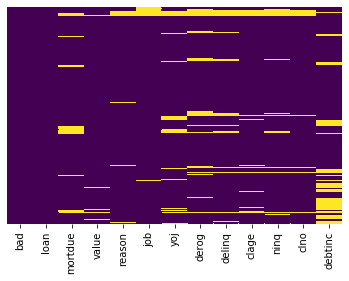

In [7]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
def eksik_deger_tablosu(data):
    eksik_deger = data.isnull().sum()
    eksik_deger_yuzde = 100 * data.isnull().sum()/len(data)
    eksik_deger_tablo = pd.concat([eksik_deger, eksik_deger_yuzde], axis=1)
    eksik_deger_tablo_son = eksik_deger_tablo.rename(
    columns = {0 : 'Eksik Değerler', 1 : '% Değeri'})
    return eksik_deger_tablo_son
eksik_deger_tablosu(df)

Eksik Değerler   % Değeri
bad                   0   0.000000
loan                  0   0.000000
mortdue             314   8.780761
value                64   1.789709
reason              147   4.110738
job                 167   4.670022
yoj                 312   8.724832
derog               427  11.940716
delinq              351   9.815436
clage               179   5.005593
ninq                303   8.473154
clno                133   3.719239
debtinc             767  21.448546

In [9]:
dfnan= df.copy()

In [10]:
dfnan['value'].unique()[0]
dfnan['value'] = dfnan['value'].fillna(dfnan['value'].unique()[0])
dfnan['clno'].unique()[0]
dfnan['clno'] = dfnan['clno'].fillna(dfnan['clno'].unique()[0])
##ilk satır değeri ile doldurduk

In [11]:
dfnan["job"] = dfnan["job"].fillna(dfnan["job"].mode()[0])
dfnan["reason"] = dfnan["reason"].fillna(dfnan["reason"].mode()[0])

In [12]:
dfnan['derog'] = dfnan['derog'].fillna(dfnan['derog'].mean())
dfnan['delinq'] = dfnan['delinq'].fillna(dfnan['delinq'].mean())
dfnan['yoj'] = dfnan['yoj'].fillna(dfnan['yoj'].mean())
dfnan['ninq'] = dfnan['ninq'].fillna(dfnan['ninq'].mean())
dfnan['mortdue'] = dfnan['mortdue'].fillna(dfnan['mortdue'].mean())
dfnan['clage'] = dfnan['clage'].fillna(dfnan['clage'].mean())

In [13]:
dfnan.dropna(subset=["debtinc"], inplace = True)

In [14]:
dfnan.isnull().sum()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [15]:
dfcategoric=dfnan.select_dtypes(include=['object'])
dfcategoric.describe().T

count unique      top  freq
reason  2809      2  DebtCon  2008
job     2809      6    Other  1239

In [16]:
dfnumeric=dfnan.select_dtypes(include=['float64','int64'])
dfnumeric.describe().T

count           mean           std       min       25%  \
bad      2809.0       0.084728      0.278526      0.00      0.00   
loan     2809.0   19102.847989  11056.450226   1700.00  11800.00   
mortdue  2809.0   75467.755465  41643.542183   4927.00  50079.00   
value    2809.0  102676.818085  52861.599164  11702.00  67964.00   
yoj      2809.0       8.891950      7.231039      0.00      3.00   
derog    2809.0       0.184259      0.605235      0.00      0.00   
delinq   2809.0       0.307586      0.788837      0.00      0.00   
clage    2809.0     183.197329     84.834548      0.49    119.08   
ninq     2809.0       1.057436      1.537466      0.00      0.00   
clno     2809.0      21.148807      9.865148      0.00     14.00   
debtinc  2809.0      33.831737      9.061837      0.72     29.14   

                  50%            75%         max  
bad          0.000000       0.000000       1.000  
loan     17000.000000   23500.000000   89900.000  
mortdue  71670.000000   90065.000000  399412.000  
value    91326.000000  119751.000000  512650.000  
yoj          8.000000      12.000000      41.000  
derog        0.000000       0.000000      10.000  
delinq       0.000000       0.432558      10.000  
clage      179.832529     231.020000    1168.230  
ninq         1.000000       1.186373      13.000  
clno        20.000000      26.000000      71.000  
debtinc     34.747000      38.940000     203.312

In [17]:
dfnan.shape

(2809, 13)

In [18]:
#job'ların sayıları
tb=pd.crosstab(index=dfnan["job"],columns="Count")
tb

col_0   Count
job          
Mgr       351
Office    474
Other    1239
ProfEx    614
Sales      47
Self       84

In [19]:
#reason'ların sayıları
tb=pd.crosstab(index=dfnan["reason"],columns="Count")
tb

col_0    Count
reason        
DebtCon   2008
HomeImp    801

In [20]:
#jobların 0 ve 1 e göre dağılımları
tb_bad_job=pd.crosstab(index=dfnan["job"],columns=dfnan["bad"],margins=True)
tb_bad_job

bad        0    1   All
job                    
Mgr      317   34   351
Office   444   30   474
Other   1127  112  1239
ProfEx   572   42   614
Sales     38    9    47
Self      73   11    84
All     2571  238  2809

In [21]:
#reasonların 0 ve 1 e göre dağılımları
tb_bad_job=pd.crosstab(index=dfnan["reason"],columns=dfnan["bad"],margins=True)
tb_bad_job

bad         0    1   All
reason                  
DebtCon  1843  165  2008
HomeImp   728   73   801
All      2571  238  2809

In [60]:
##numeric değişkenler bazında bad değerlerinin ortalaması
i=1
for i in dfnumeric.columns:
    x=dfnumeric.groupby('bad')[i].apply(lambda x: np.mean(x))
    print(x)

bad
0    0.0
1    1.0
Name: bad, dtype: float64
bad
0    19192.337612
1    18136.134454
Name: loan, dtype: float64
bad
0    75659.101459
1    73400.736352
Name: mortdue, dtype: float64
bad
0    103026.648386
1     98897.768908
Name: value, dtype: float64
bad
0    8.970763
1    8.040576
Name: yoj, dtype: float64
bad
0    0.151272
1    0.540602
Name: derog, dtype: float64
bad
0    0.249081
1    0.939594
Name: delinq, dtype: float64
bad
0    185.747185
1    155.652449
Name: clage, dtype: float64
bad
0    1.020826
1    1.452923
Name: ninq, dtype: float64
bad
0    21.203423
1    20.558824
Name: clno, dtype: float64
bad
0    33.179142
1    40.881416
Name: debtinc, dtype: float64


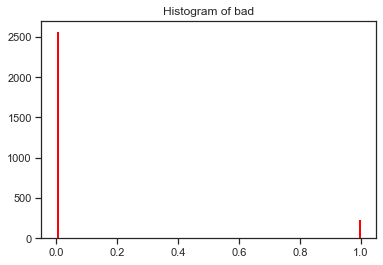

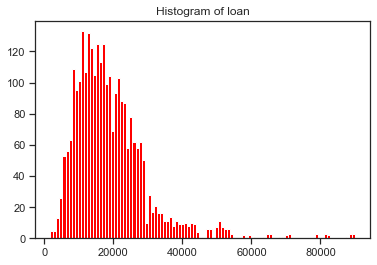

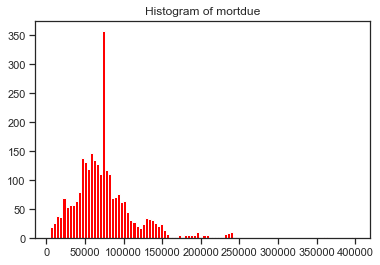

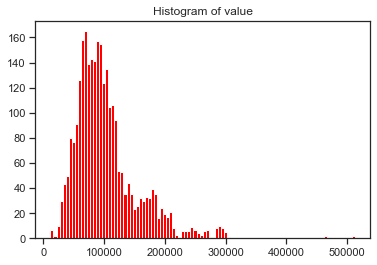

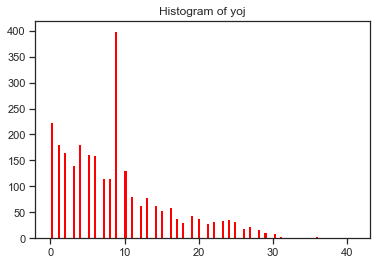

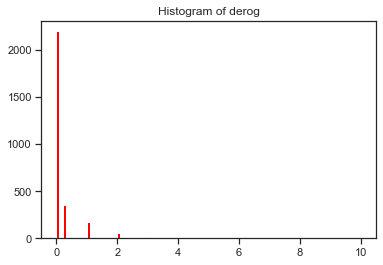

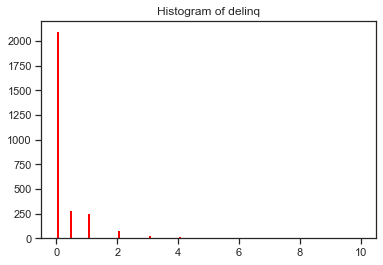

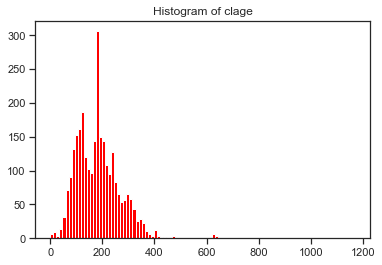

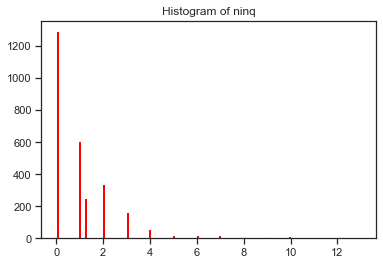

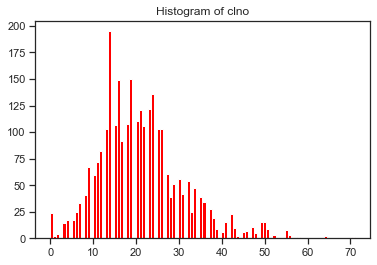

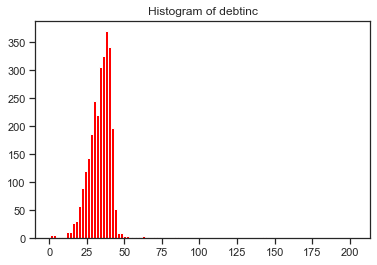

In [61]:
#tüm nümeriklerin histogram grafikleri
i=0
for i in dfnumeric.columns:
        plt.figure()
        plt.hist(dfnumeric[i],bins=100,color="red")
        plt.title("Histogram of " + i)

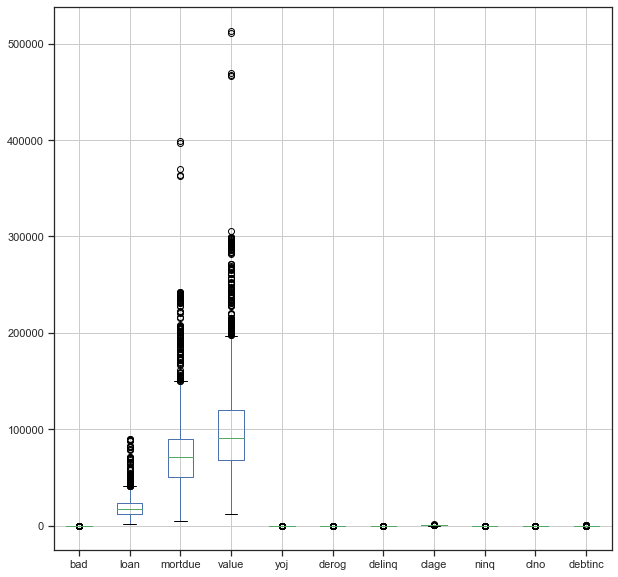

In [62]:
#tüm verinin boxplotu
dfnan.boxplot(figsize=(10,10))

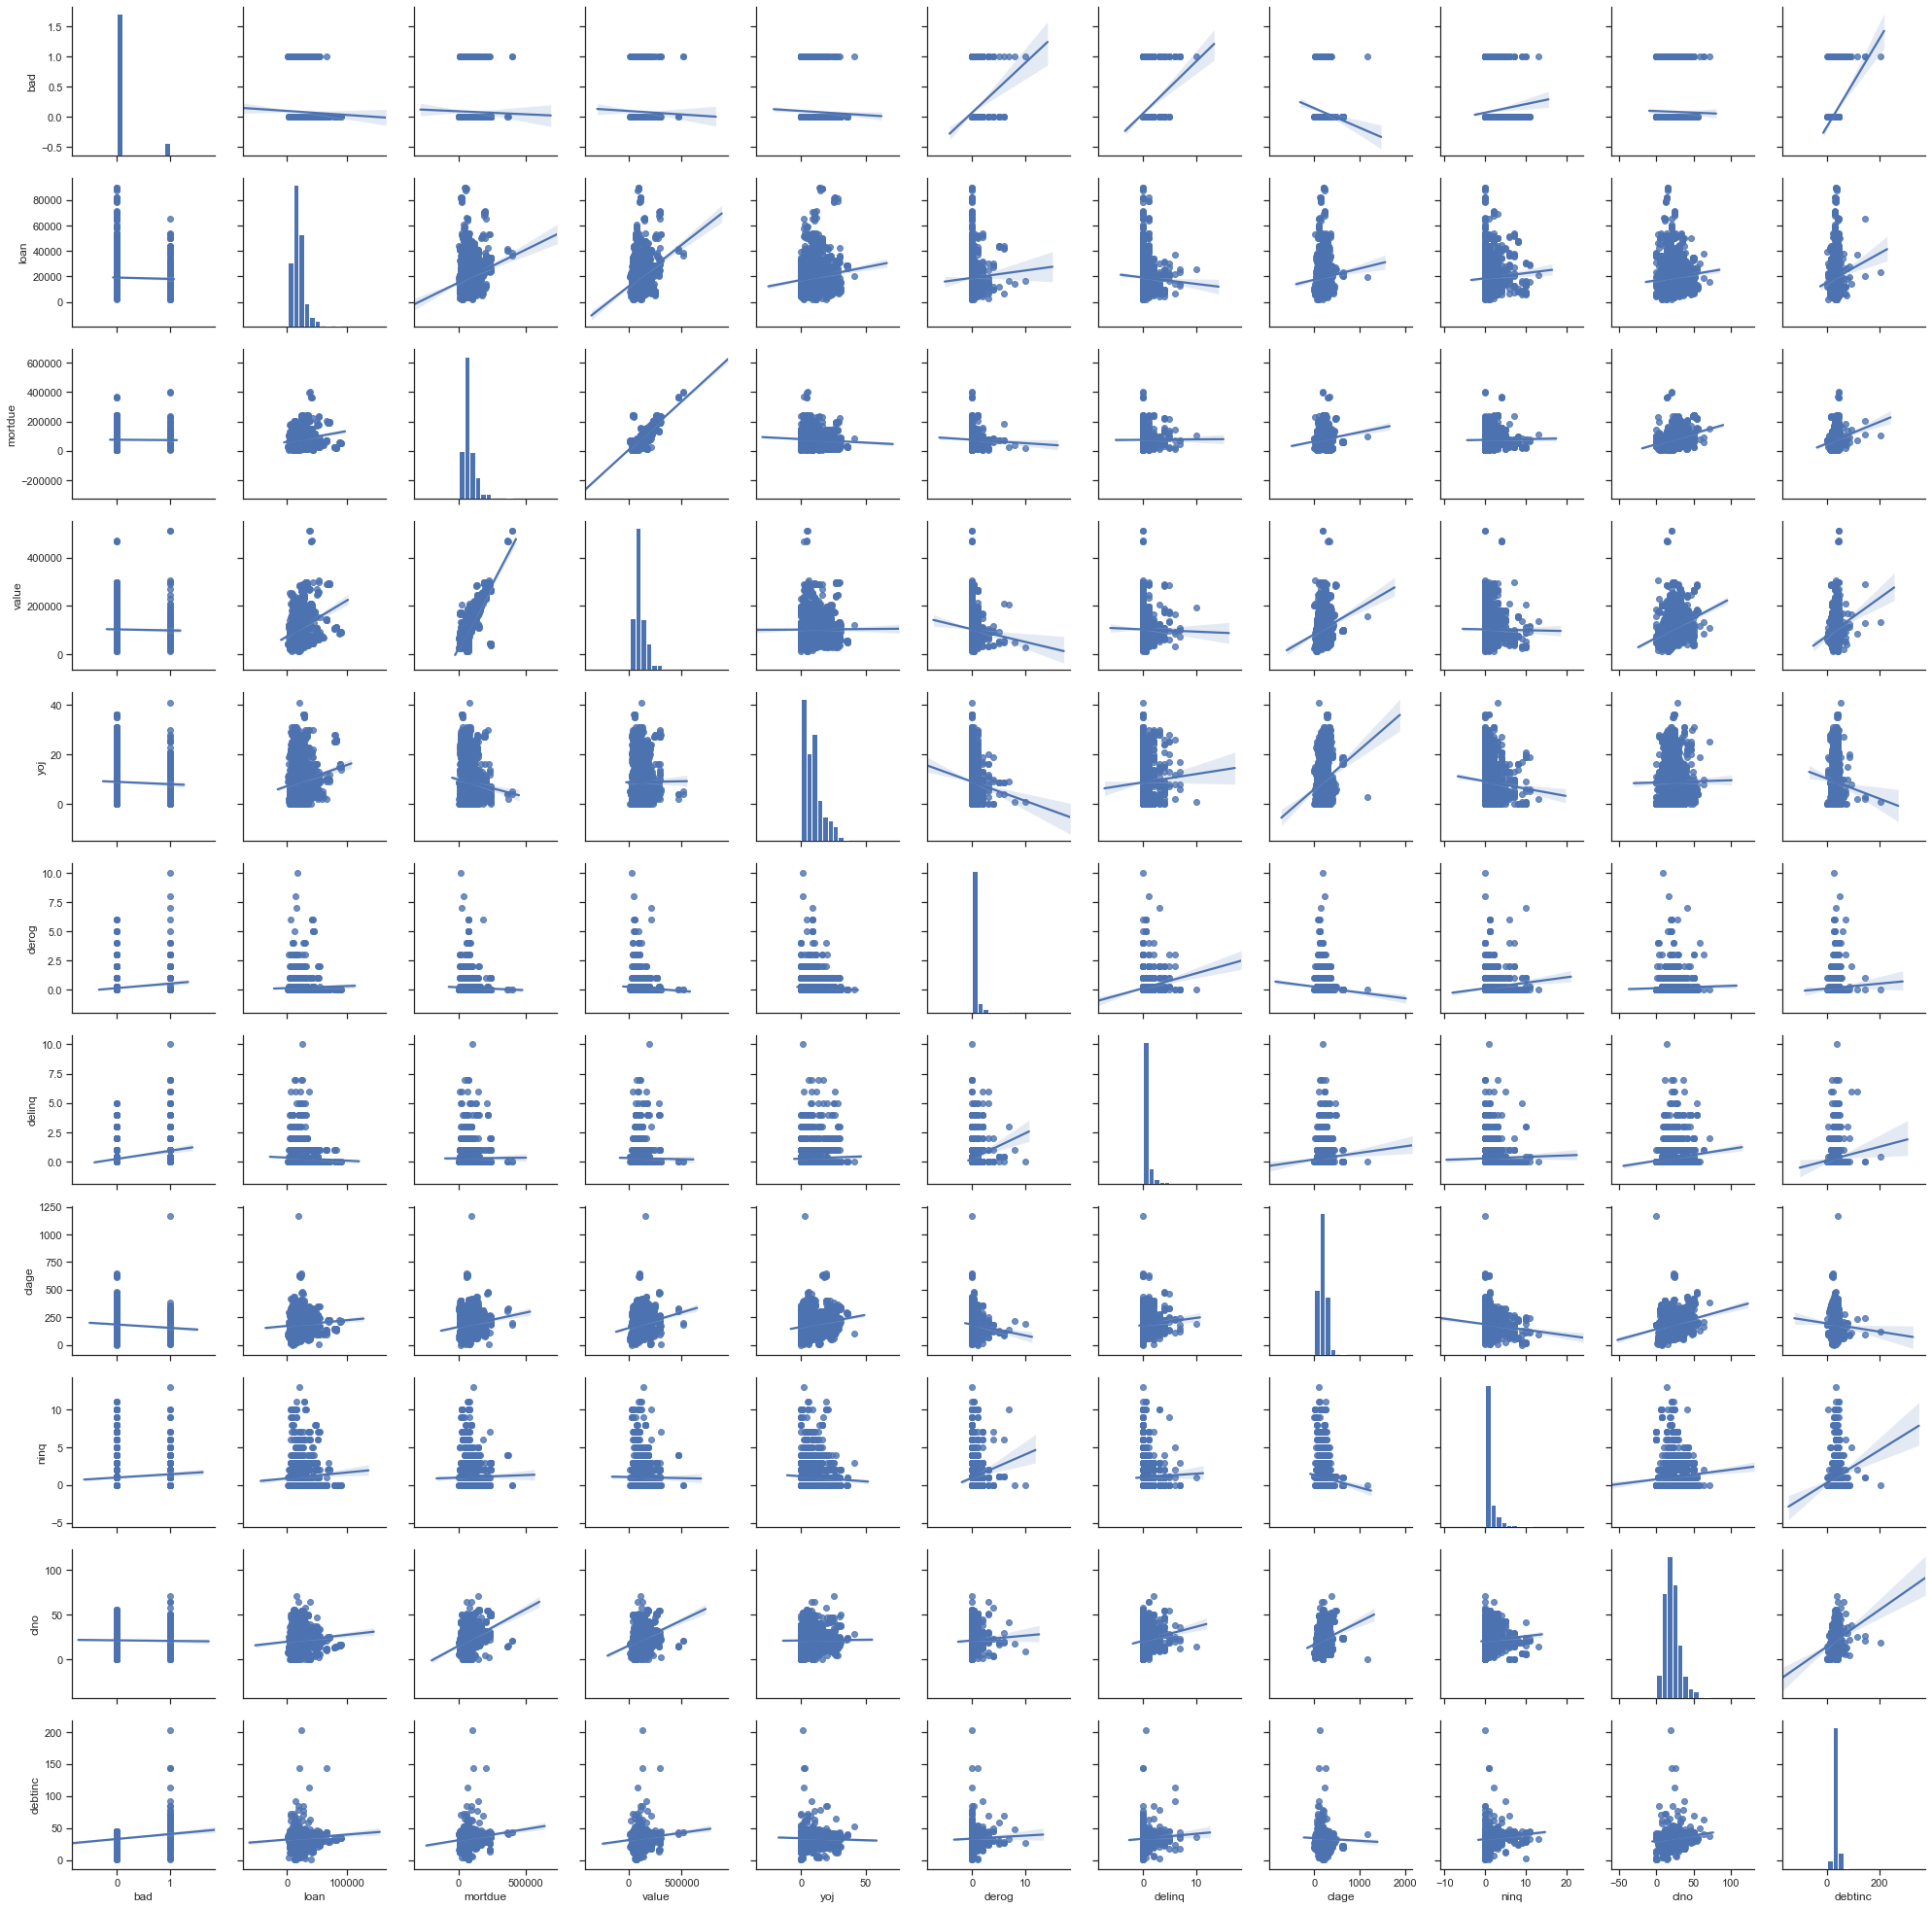

In [26]:
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)
sns.pairplot(dfnan, kind="reg")

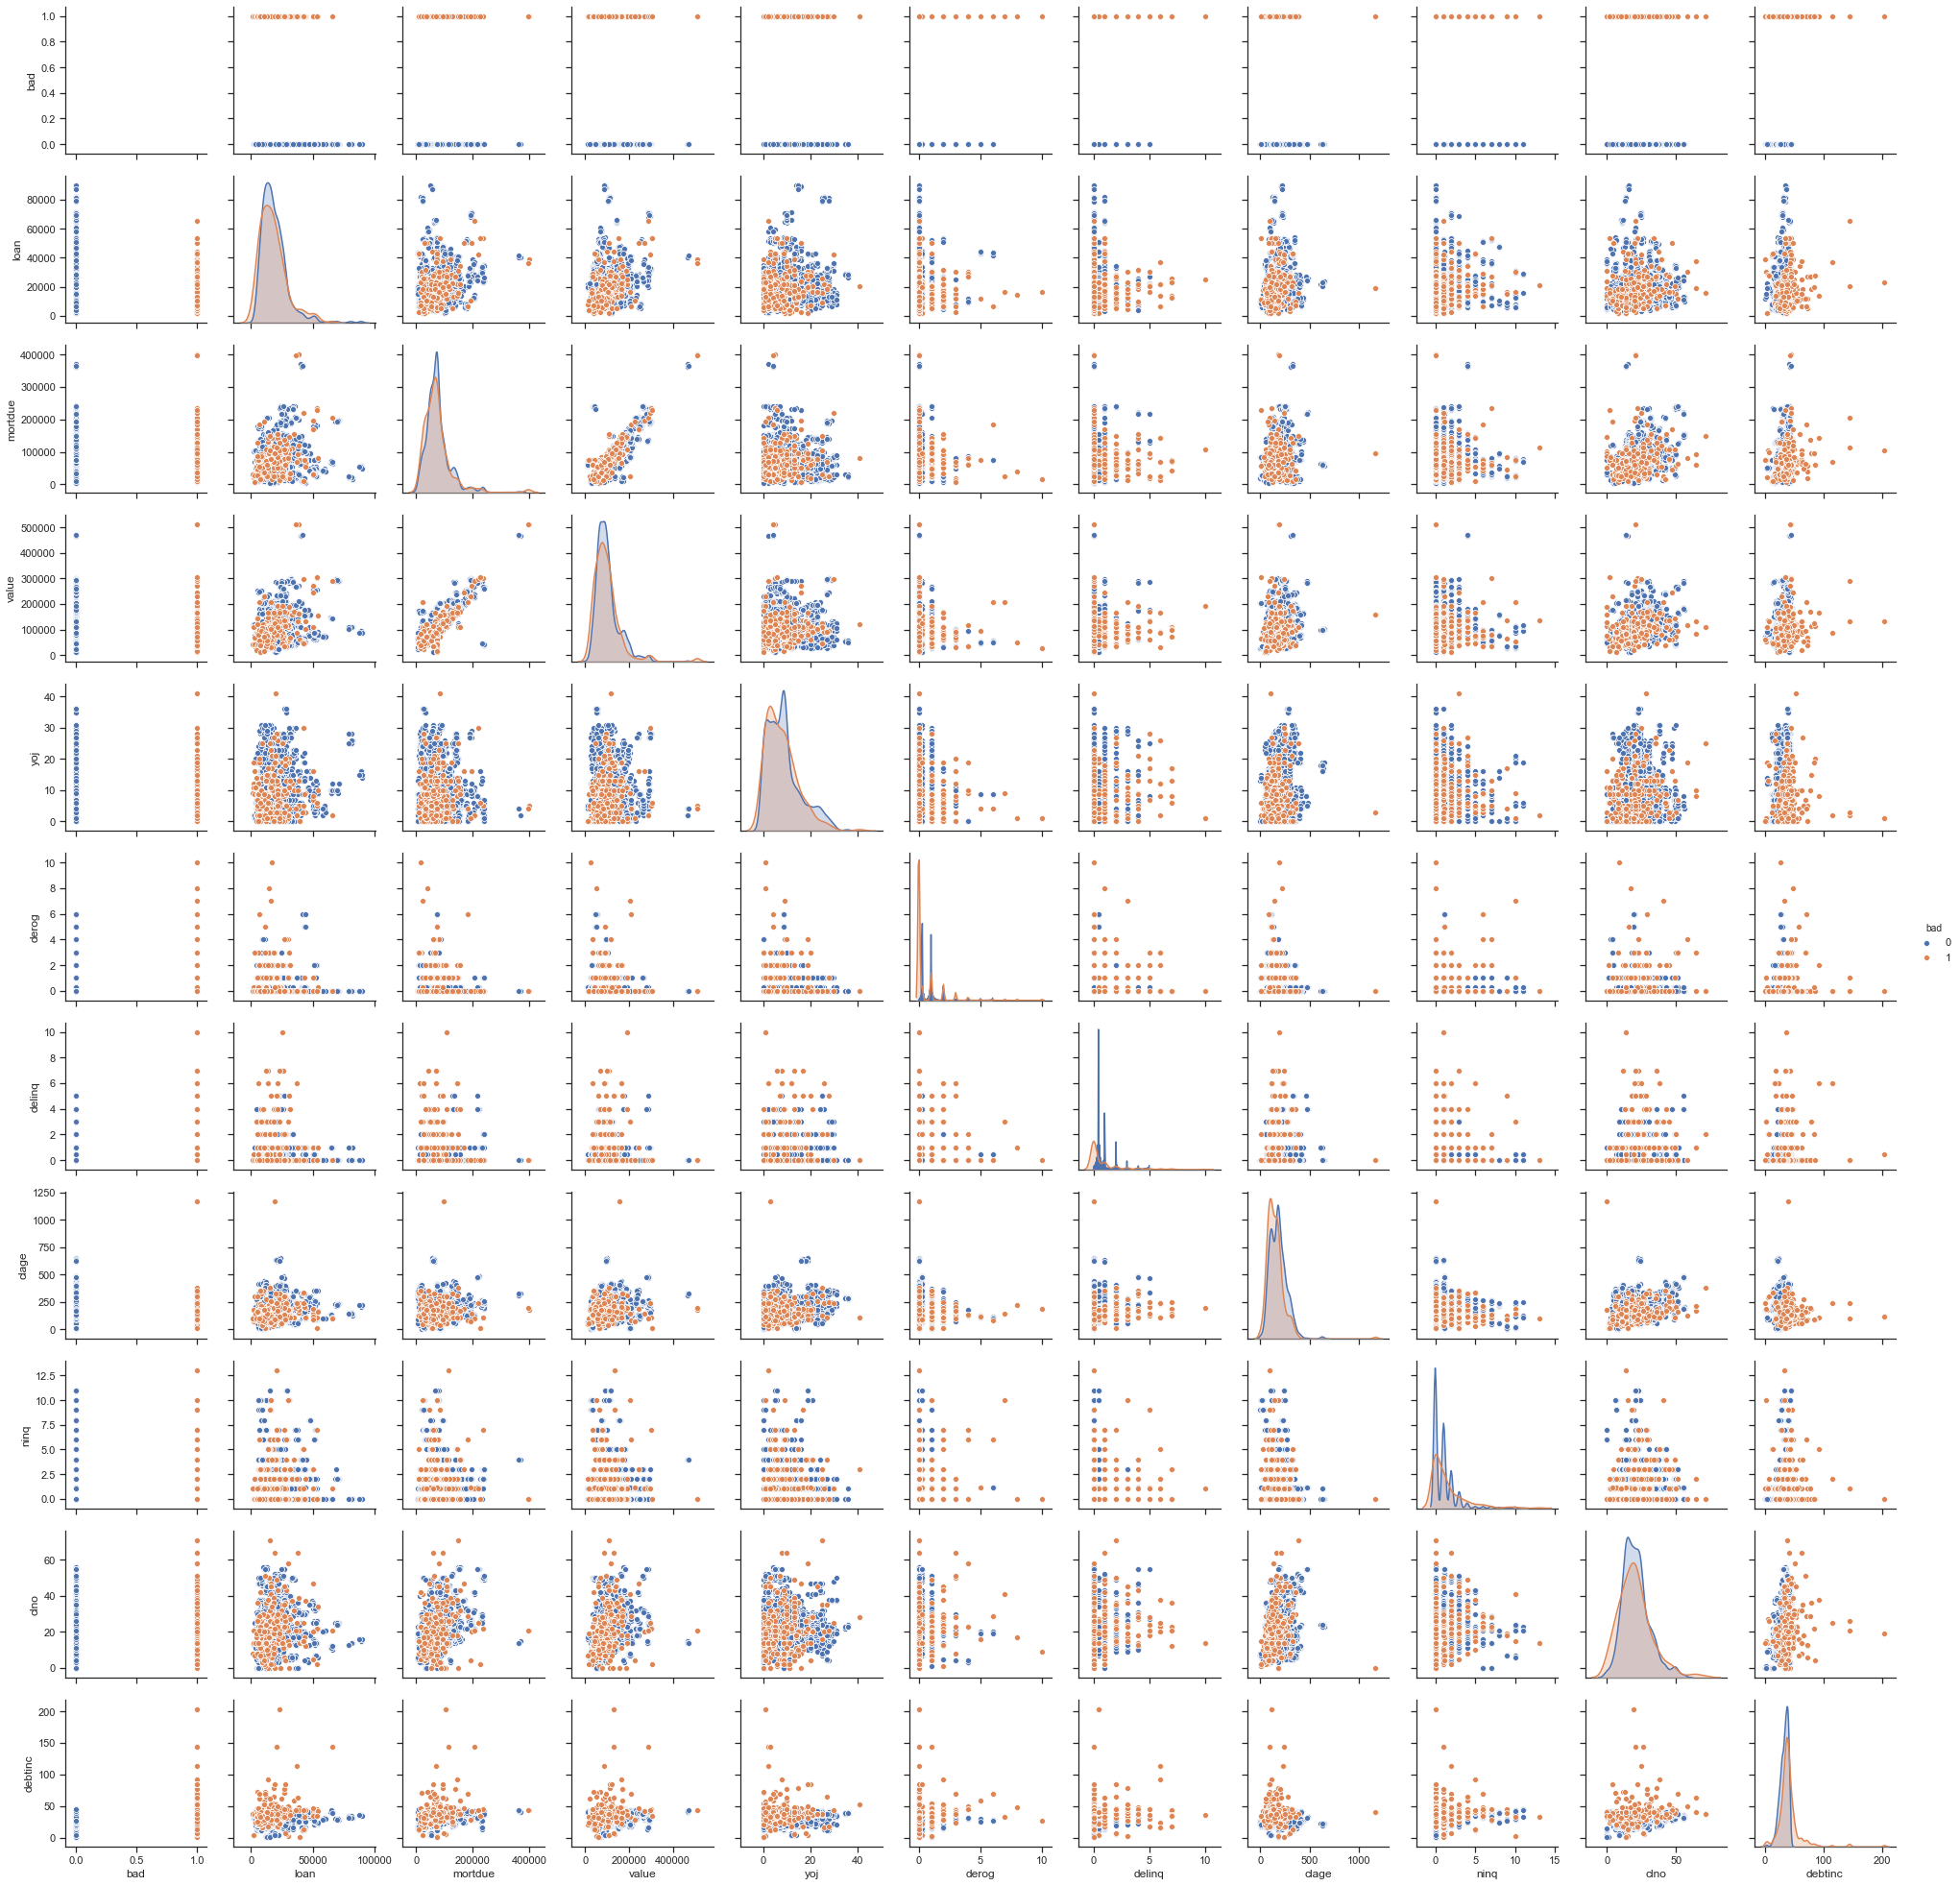

In [64]:
sns.pairplot(dfnan, hue = "bad")

In [65]:
def class_imbalance(data_frame, col):
    try:
        col_vals = data_frame[col].value_counts()
        col_vals = col_vals.reset_index()
        if len(col_vals['index']) > 20:
            print('Warning: values in column are more than 20 \nPlease try a column with lower value counts!')
        else:
            f = lambda x, y: 100 * (x / sum(y))
            for i in range(0, len(col_vals['index'])):
                print('{0} accounts for {1:.2f}% of the {2} column'\
                      .format(col_vals['index'][i],
                              f(col_vals[col].iloc[i],
                                col_vals[col]),
                              col))
    except KeyError as e:
        print('{0}: Not found'.format(e))
        print('Please choose the right column name!')

In [66]:
class_imbalance(dfnan, 'bad')

0 accounts for 91.53% of the bad column
1 accounts for 8.47% of the bad column


In [67]:
dfnan["bad"].value_counts()

0    2571
1     238
Name: bad, dtype: int64

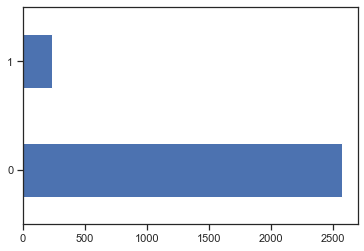

In [68]:
dfnan["bad"].value_counts().plot.barh();

In [71]:
from scipy.stats import shapiro
from scipy import stats
baduniq=pd.unique(dfnan.bad.values)
baduniq
alpha=0.05
for i in dfnan.columns:
    if (i!='reason' and i!='job' and i!='bad'):
        for name in baduniq:
            stat,p=shapiro(dfnan[i][dfnan['bad']==name])
            print(i)
            print(name,"Statistic: %.3f, P =" %stat , p)        
            if p >alpha:
                print('Orneklem Normal (Gaussian) dağılımdan gelmektedir(fail to reject)')  
            else:
                print('Orneklem Normal (Gaussian) dağılımından gelmemektedir(reject H0)')

loan
0 Statistic: 0.831, P = 0.0
Orneklem Normal (Gaussian) dağılımından gelmemektedir(reject H0)
loan
1 Statistic: 0.900, P = 1.7481852770950823e-11
Orneklem Normal (Gaussian) dağılımından gelmemektedir(reject H0)
mortdue
0 Statistic: 0.889, P = 1.4974877948114655e-39
Orneklem Normal (Gaussian) dağılımından gelmemektedir(reject H0)
mortdue
1 Statistic: 0.767, P = 4.423957544148461e-18
Orneklem Normal (Gaussian) dağılımından gelmemektedir(reject H0)
value
0 Statistic: 0.882, P = 1.8296754048689136e-40
Orneklem Normal (Gaussian) dağılımından gelmemektedir(reject H0)
value
1 Statistic: 0.765, P = 3.669303714113776e-18
Orneklem Normal (Gaussian) dağılımından gelmemektedir(reject H0)
yoj
0 Statistic: 0.909, P = 1.0250360602974902e-36
Orneklem Normal (Gaussian) dağılımından gelmemektedir(reject H0)
yoj
1 Statistic: 0.901, P = 2.081060844483229e-11
Orneklem Normal (Gaussian) dağılımından gelmemektedir(reject H0)
derog
0 Statistic: 0.343, P = 0.0
Orneklem Normal (Gaussian) dağılımından gelmem

In [72]:
from scipy.stats import levene
from scipy import stats
for i in dfnan.columns:
    if (i!='reason' and i!='job' and i!='bad'):
        stat,p = levene(dfnan[i][dfnan['bad'] == 0], dfnan[i][dfnumeric['bad'] == 1]) 
        print("\n",i,"Statistic: %.3f  P =" %stat , p)
        alpha=0.05
        if p >alpha:
            print('Orneklem için varyans homojendir (Fail to Reject H0))')
        else:
            print('Orneklem için varyans homojen degildir.(reject H0)')


 loan Statistic: 1.422  P = 0.2330960261052851
Orneklem için varyans homojendir (Fail to Reject H0))

 mortdue Statistic: 2.049  P = 0.15237348437642678
Orneklem için varyans homojendir (Fail to Reject H0))

 value Statistic: 1.700  P = 0.19233005482696097
Orneklem için varyans homojendir (Fail to Reject H0))

 yoj Statistic: 0.528  P = 0.46766490480247824
Orneklem için varyans homojendir (Fail to Reject H0))

 derog Statistic: 93.096  P = 1.0775336245596956e-21
Orneklem için varyans homojen degildir.(reject H0)

 delinq Statistic: 177.401  P = 2.7192607975169486e-39
Orneklem için varyans homojen degildir.(reject H0)

 clage Statistic: 0.574  P = 0.44863537132482445
Orneklem için varyans homojendir (Fail to Reject H0))

 ninq Statistic: 24.933  P = 6.297477281638495e-07
Orneklem için varyans homojen degildir.(reject H0)

 clno Statistic: 13.667  P = 0.00022242791596568555
Orneklem için varyans homojen degildir.(reject H0)

 debtinc Statistic: 127.528  P = 5.937400593967627e-29
Ornekle

In [73]:
def ttest_2sample(column1, column2):
        import scipy
        from scipy import stats 
        from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
        import plotly.figure_factory as ff
        x1=pd.Series(dfnan[column1].iloc[:][dfnan[column2]==1])
        x2=pd.Series(dfnan[column1].iloc[:][dfnan[column2]==0])
        twosample_results = scipy.stats.ttest_ind(x1,x2)
        matrix_twosample = [  [column1, 'Test Statistic', 'p-value'],
                  ['Sample Data', twosample_results[0], twosample_results[1]]]
        twosample_table = ff.create_table(matrix_twosample, index=True)
        iplot(twosample_table, filename='twosample-table')
        alpha = 0.05
        if twosample_results[1]<alpha:
            print("Aralarında istatistiksel olarak anlamlı bir fark vardır. (fail to reject H0)")
        else:
            print("Aralarında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)")

In [74]:
from scipy import stats
for i in dfnan.columns:
    if (i!='reason' and i!='job' and i!='bad'):
        ttest_2sample(i, "bad")


Aralarında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)


Aralarında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)


Aralarında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)


Aralarında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)


Aralarında istatistiksel olarak anlamlı bir fark vardır. (fail to reject H0)


Aralarında istatistiksel olarak anlamlı bir fark vardır. (fail to reject H0)


Aralarında istatistiksel olarak anlamlı bir fark vardır. (fail to reject H0)


Aralarında istatistiksel olarak anlamlı bir fark vardır. (fail to reject H0)


Aralarında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)


Aralarında istatistiksel olarak anlamlı bir fark vardır. (fail to reject H0)


In [18]:
dms = pd.get_dummies(dfnan[['reason', 'job']])
dms.head()
y = dfnan["bad"]
X_ = dfnan.drop(["bad", "reason", "job"], axis = 1).astype("float64")
X_.head()


loan   mortdue     value   yoj  derog  delinq   clage  ninq  clno  \
0  81200.0   18834.0  108355.0  28.0    0.0     0.0  139.14   0.0  14.0   
1  12600.0  103960.0  127384.0   2.0    0.0     0.0  129.02   0.0  25.0   
2  18000.0   46865.0   61266.0   5.0    0.0     0.0  102.59   2.0   9.0   
3  10300.0   57676.0   71027.0  19.0    0.0     0.0  157.52   1.0  11.0   
4   9400.0   56508.0   78358.0  17.0    0.0     0.0  141.93   0.0  11.0   

   debtinc  
0   34.042  
1   34.479  
2   26.354  
3   33.992  
4   32.327

In [19]:
X = pd.concat([X_, dms[["reason_HomeImp", "job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
X.head()

loan   mortdue     value   yoj  derog  delinq   clage  ninq  clno  \
0  81200.0   18834.0  108355.0  28.0    0.0     0.0  139.14   0.0  14.0   
1  12600.0  103960.0  127384.0   2.0    0.0     0.0  129.02   0.0  25.0   
2  18000.0   46865.0   61266.0   5.0    0.0     0.0  102.59   2.0   9.0   
3  10300.0   57676.0   71027.0  19.0    0.0     0.0  157.52   1.0  11.0   
4   9400.0   56508.0   78358.0  17.0    0.0     0.0  141.93   0.0  11.0   

   debtinc  reason_HomeImp  job_Mgr  job_Office  job_Other  job_ProfEx  \
0   34.042               1        0           0          1           0   
1   34.479               0        0           0          1           0   
2   26.354               0        0           0          1           0   
3   33.992               0        0           0          1           0   
4   32.327               0        0           0          1           0   

   job_Sales  job_Self  
0          0         0  
1          0         0  
2          0         0  
3          0         0  
4          0         0

# LOGISTIC REGRESSON

In [77]:
import statsmodels.api as sm
loj = sm.Logit(y,X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.233042
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2809
Model:                          Logit   Df Residuals:                     2792
Method:                           MLE   Df Model:                           16
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.1969
Time:                        21:32:07   Log-Likelihood:                -654.62
converged:                       True   LL-Null:                       -815.08
Covariance Type:            nonrobust   LLR p-value:                 1.165e-58
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -1.164e-05   8.19e-06     -1.420      0.155   -2.77e-05    4.42e-06
mortdue        -1.714e-06   3.53e-06     -0.485      0.628   -8.64e-06    5.21e-06
value           1.144e-06    2.9e-06      0.395      0.693   -4.53e-06    6.82e-06
yoj               -0.0034      0.012     -0.294      0.769      -0.026       0.019
derog              0.4395      0.090      4.869      0.000       0.263       0.616
delinq             0.6893      0.074      9.270      0.000       0.544       0.835
clage             -0.0048      0.001     -4.295      0.000      -0.007      -0.003
ninq               0.0816      0.042      1.944      0.052      -0.001       0.164
clno              -0.0272      0.009     -3.012      0.003      -0.045      -0.010
debtinc            0.1044      0.011      9.252      0.000       0.082       0.127
reason_HomeImp     0.0984      0.171      0.577      0.564      -0.236       0.433
job_Mgr           -5.1606      0.522     -9.893      0.000      -6.183      -4.138
job_Office        -5.5021      0.515    -10.692      0.000      -6.511      -4.493
job_Other         -5.0403      0.467    -10.794      0.000      -5.956      -4.125
job_ProfEx        -4.9233      0.502     -9.814      0.000      -5.907      -3.940
job_Sales         -4.2235      0.654     -6.461      0.000      -5.505      -2.942
job_Self          -4.5667      0.651     -7.016      0.000      -5.842      -3.291
==================================================================================
"""

In [78]:
#scikit-learn
#statsmodelsda oldugu kadar detaylı bilgi vermiyor pvalueları tam karsılaştıramaıyoruz statsmodeldan farkı
#hangi datastructurea uygun olarak model yapacağımızı bilmiyorsak scikit mantıklı farklı solverlarla çözebildiğimiz için

In [79]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
loj_model.intercept_

array([-0.0009791])

In [81]:

loj_model.coef_

array([[-3.39406600e-05, -7.31929221e-06, -1.07791156e-06,
        -6.39377031e-03,  2.25313914e-03,  4.40875504e-03,
        -9.10150470e-03,  1.02079964e-03, -6.74536161e-03,
         1.79719836e-02, -2.44764523e-04,  1.65113761e-05,
        -4.89575532e-04, -6.52035451e-04, -1.41813967e-04,
         1.44755247e-04,  1.43055290e-04]])

# Tahmin-Model Tunning

In [82]:
y_pred = loj_model.predict(X)

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix(y, y_pred)

array([[2571,    0],
       [ 237,    1]], dtype=int64)

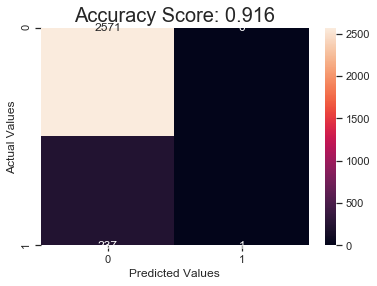

In [84]:
predictions = loj_model.predict(X)
score = round(accuracy_score(y, predictions), 3)
cm1 = confusion_matrix(y, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 20)
plt.show()

In [85]:
accuracy_score(y, y_pred)

0.9156283374866501

In [86]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2571
           1       1.00      0.00      0.01       238

    accuracy                           0.92      2809
   macro avg       0.96      0.50      0.48      2809
weighted avg       0.92      0.92      0.88      2809



In [87]:
loj_model.predict(X)[0:10]
#ilk10u istedik

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [88]:
loj_model.predict_proba(X)[0:10][:,0:2]
#probability
#0 olma olasılığı ve  olma olasılıkları

array([[0.98093305, 0.01906695],
       [0.88730937, 0.11269063],
       [0.82811782, 0.17188218],
       [0.86615175, 0.13384825],
       [0.84715045, 0.15284955],
       [0.81340887, 0.18659113],
       [0.98099246, 0.01900754],
       [0.89436505, 0.10563495],
       [0.93676848, 0.06323152],
       [0.87396699, 0.12603301]])

In [89]:
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: bad, dtype: int64

In [90]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [91]:
y_probs[0:10]

array([0.01906695, 0.11269063, 0.17188218, 0.13384825, 0.15284955,
       0.18659113, 0.01900754, 0.10563495, 0.06323152, 0.12603301])

In [92]:
y_pred = [1 if i> 0.4 else 0 for i in y_probs]
#thresholdu ben kendim de belirleyebilirim

In [93]:
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [94]:
confusion_matrix(y, y_pred)

array([[2563,    8],
       [ 237,    1]], dtype=int64)

In [95]:
accuracy_score(y, y_pred)

0.9127803488786045

In [96]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95      2571
           1       0.11      0.00      0.01       238

    accuracy                           0.91      2809
   macro avg       0.51      0.50      0.48      2809
weighted avg       0.85      0.91      0.87      2809



In [97]:
loj_model.predict_proba(X)[:,1][0:6]

array([0.01906695, 0.11269063, 0.17188218, 0.13384825, 0.15284955,
       0.18659113])

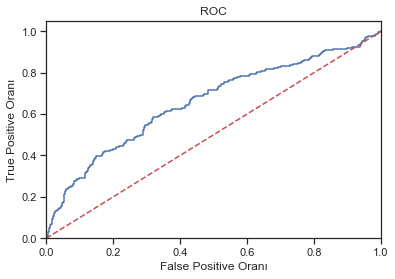

In [98]:
from sklearn.metrics import roc_auc_score,roc_curve
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [99]:
logit_roc_auc

0.5021008403361344

In [100]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.20, random_state= 42)

In [101]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
y_pred  = loj_model.predict(X_test)

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       517
           1       0.00      0.00      0.00        45

    accuracy                           0.92       562
   macro avg       0.46      0.50      0.48       562
weighted avg       0.85      0.92      0.88       562



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [104]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.9200364547732969

In [105]:
datacorr=dfnan.copy()
del datacorr['bad']
del datacorr['job']
del datacorr['reason']
datacorr.cov()

loan       mortdue         value           yoj        derog  \
loan     1.222451e+08  8.967349e+07  1.817795e+08  10421.004059   209.359372   
mortdue  8.967349e+07  1.734185e+09  1.835047e+09 -24525.639615  -859.712284   
value    1.817795e+08  1.835047e+09  2.794349e+09   2182.526157 -1917.377406   
yoj      1.042100e+04 -2.452564e+04  2.182526e+03     52.287923    -0.282551   
derog    2.093594e+02 -8.597123e+02 -1.917377e+03     -0.282551     0.366309   
delinq  -3.146721e+02  1.735356e+02 -5.791699e+02      0.207321     0.078932   
clage    6.320014e+04  4.497556e+05  7.873269e+05    114.131821    -3.594373   
ninq     9.490198e+02  1.149088e+03 -8.312485e+02     -0.705726     0.111728   
clno     9.417917e+03  1.419002e+05  1.577220e+05      0.874090     0.197189   
debtinc  9.381524e+03  5.967869e+04  6.395531e+04     -3.298271     0.172012   

             delinq          clage         ninq           clno       debtinc  
loan    -314.672113   63200.138831   949.019778    9417.916503   9381.523612  
mortdue  173.535636  449755.586835  1149.088142  141900.178403  59678.692360  
value   -579.169917  787326.897922  -831.248503  157722.003576  63955.310426  
yoj        0.207321     114.131821    -0.705726       0.874090     -3.298271  
derog      0.078932      -3.594373     0.111728       0.197189      0.172012  
delinq     0.622264       3.996993     0.029826       0.975951      0.479806  
clage      3.996993    7196.900596   -11.911146     182.811894    -30.645103  
ninq       0.029826     -11.911146     2.363802       1.233904      1.758136  
clno       0.975951     182.811894     1.233904      97.321153     16.792426  
debtinc    0.479806     -30.645103     1.758136      16.792426     82.116882

In [106]:
datacorr.corr()

loan   mortdue     value       yoj     derog    delinq     clage  \
loan     1.000000  0.194760  0.311020  0.130345  0.031286 -0.036079  0.067380   
mortdue  0.194760  1.000000  0.833603 -0.081446 -0.034110  0.005283  0.127308   
value    0.311020  0.833603  1.000000  0.005710 -0.059930 -0.013889  0.175567   
yoj      0.130345 -0.081446  0.005710  1.000000 -0.064561  0.036346  0.186052   
derog    0.031286 -0.034110 -0.059930 -0.064561  1.000000  0.165326 -0.070005   
delinq  -0.036079  0.005283 -0.013889  0.036346  0.165326  1.000000  0.059727   
clage    0.067380  0.127308  0.175567  0.186052 -0.070005  0.059727  1.000000   
ninq     0.055828  0.017947 -0.010228 -0.063479  0.120070  0.024592 -0.091322   
clno     0.086345  0.345407  0.302446  0.012253  0.033026  0.125411  0.218438   
debtinc  0.093636  0.158145  0.133512 -0.050335  0.031363  0.067122 -0.039863   

             ninq      clno   debtinc  
loan     0.055828  0.086345  0.093636  
mortdue  0.017947  0.345407  0.158145  
value   -0.010228  0.302446  0.133512  
yoj     -0.063479  0.012253 -0.050335  
derog    0.120070  0.033026  0.031363  
delinq   0.024592  0.125411  0.067122  
clage   -0.091322  0.218438 -0.039863  
ninq     1.000000  0.081353  0.126192  
clno     0.081353  1.000000  0.187842  
debtinc  0.126192  0.187842  1.000000

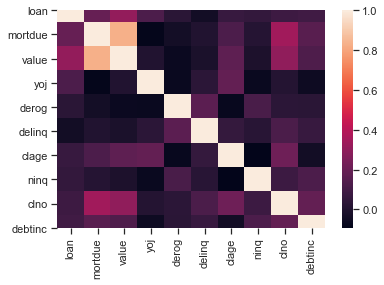

In [107]:
corr = datacorr.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [108]:
target=dfnan['bad'] 
features= datacorr
corr1 = pd.concat([target, features], axis=1, keys=['target', 'features']).corr().loc['features', 'target']
c1 = corr1.abs().unstack()
c1.sort_values(ascending = False)

bad  delinq     0.243809
     debtinc    0.236738
     derog      0.179168
     clage      0.098806
     ninq       0.078278
     yoj        0.035829
     loan       0.026607
     value      0.021755
     clno       0.018199
     mortdue    0.015105
dtype: float64

In [109]:
##target ve diğer değişkenler arasında korelansyonu en yüksek olanlar
c1.sort_values(ascending=True, inplace=True)
columns_above_1 = [(col1, col2) for col1, col2 in c1.index if c1[col1,col2] > 0.05 and col1 != col2]

In [110]:
columns_above_1

[('bad', 'ninq'),
 ('bad', 'clage'),
 ('bad', 'derog'),
 ('bad', 'debtinc'),
 ('bad', 'delinq')]

In [111]:
dfnew=dfnan.copy()
del dfnew['mortdue']
del dfnew['clno']
del dfnew['yoj']
del dfnew['loan']
del dfnew['reason']
del dfnew['job']
del dfnew['value']

In [112]:
y = dfnew["bad"]
X = dfnew.drop(["bad"], axis=1)

In [115]:
loj = sm.Logit(y,X)
loj_model1 = loj.fit()
loj_model1.summary()


Optimization terminated successfully.
         Current function value: 0.277433
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2809
Model:                          Logit   Df Residuals:                     2804
Method:                           MLE   Df Model:                            4
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                 0.04388
Time:                        21:33:56   Log-Likelihood:                -779.31
converged:                       True   LL-Null:                       -815.08
Covariance Type:            nonrobust   LLR p-value:                 1.075e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
derog          0.3220      0.075      4.293      0.000       0.175       0.469
delinq         0.6560      0.067      9.719      0.000       0.524       0.788
clage         -0.0143      0.001    -13.931      0.000      -0.016      -0.012
ninq          -0.0280      0.041     -0.688      0.491      -0.108       0.052
debtinc       -0.0096      0.004     -2.149      0.032      -0.018      -0.001
==============================================================================
"""

In [117]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model1 = loj.fit(X,y)
loj_model1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
loj_model1.intercept_

array([-4.48786437])

In [118]:
loj_model1.coef_

array([[ 0.39971173,  0.62373068, -0.00661911,  0.05400999,  0.07739947]])

# Tahmin-Model Tunning2

In [121]:
y_pred = loj_model1.predict(X)

In [122]:
confusion_matrix(y, y_pred)

array([[2560,   11],
       [ 198,   40]], dtype=int64)

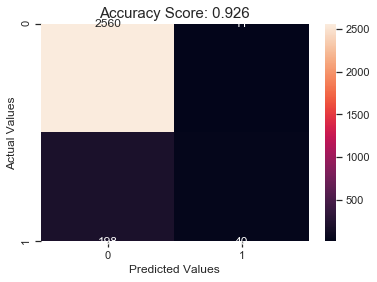

In [123]:
predictions = loj_model1.predict(X)
score = round(accuracy_score(y, predictions), 3)
cm1 = confusion_matrix(y, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [124]:
accuracy_score(y, y_pred)

0.9255962976148095

In [125]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2571
           1       0.78      0.17      0.28       238

    accuracy                           0.93      2809
   macro avg       0.86      0.58      0.62      2809
weighted avg       0.92      0.93      0.90      2809



In [126]:
loj_model1.predict(X)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [127]:
loj_model1.predict_proba(X)[0:10][:,0:2]

array([[0.9412554 , 0.0587446 ],
       [0.93542697, 0.06457303],
       [0.95343019, 0.04656981],
       [0.9450874 , 0.0549126 ],
       [0.9490793 , 0.0509207 ],
       [0.9547605 , 0.0452395 ],
       [0.91010243, 0.08989757],
       [0.96472361, 0.03527639],
       [0.93543811, 0.06456189],
       [0.95181147, 0.04818853]])

In [128]:
y_probs = loj_model1.predict_proba(X)
y_probs = y_probs[:,1]

In [129]:
y_probs[0:10]

array([0.0587446 , 0.06457303, 0.04656981, 0.0549126 , 0.0509207 ,
       0.0452395 , 0.08989757, 0.03527639, 0.06456189, 0.04818853])

In [130]:
y_pred = [1 if i> 0.3 else 0 for i in y_probs]

In [131]:
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [132]:
confusion_matrix(y, y_pred)
#daha iyi sonuclar elde ettik 0.3 threshold ile

array([[2537,   34],
       [ 179,   59]], dtype=int64)

In [133]:
accuracy_score(y, y_pred)

0.9241723033107867

In [134]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2571
           1       0.63      0.25      0.36       238

    accuracy                           0.92      2809
   macro avg       0.78      0.62      0.66      2809
weighted avg       0.91      0.92      0.91      2809



In [136]:
loj_model1.predict_proba(X)[:,1][0:6]

array([0.0587446 , 0.06457303, 0.04656981, 0.0549126 , 0.0509207 ,
       0.0452395 ])

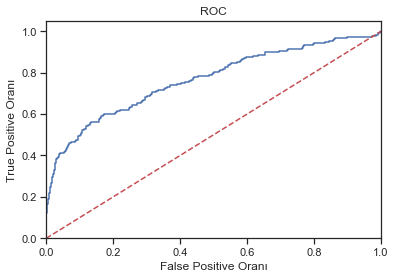

In [137]:
logit_roc_auc = roc_auc_score(y, loj_model1.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model1.predict_proba(X)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [138]:
logit_roc_auc

0.5818943680155844

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 42)

In [140]:
loj = LogisticRegression(solver = "liblinear")
loj_model1 = loj.fit(X_train, y_train)
loj_model1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
y_pred  = loj_model1.predict(X_test)

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       517
           1       0.75      0.20      0.32        45

    accuracy                           0.93       562
   macro avg       0.84      0.60      0.64       562
weighted avg       0.92      0.93      0.91       562



In [143]:
cross_val_score(loj_model1, X_test, y_test, cv=10).mean()
#randomlıktan gelen durum mu yoksa gerçekten anlamlı bir model mi yapmışım?

0.9271804511278194

# DecisionTreeClassifier

In [148]:
dms = pd.get_dummies(dfnan[['reason', 'job']])
dms.head()
y = dfnan["bad"]
X_ = dfnan.drop(["bad", "reason", "job"], axis = 1).astype("float64")
X_.head()

loan   mortdue     value   yoj  derog  delinq   clage  ninq  clno  \
0  81200.0   18834.0  108355.0  28.0    0.0     0.0  139.14   0.0  14.0   
1  12600.0  103960.0  127384.0   2.0    0.0     0.0  129.02   0.0  25.0   
2  18000.0   46865.0   61266.0   5.0    0.0     0.0  102.59   2.0   9.0   
3  10300.0   57676.0   71027.0  19.0    0.0     0.0  157.52   1.0  11.0   
4   9400.0   56508.0   78358.0  17.0    0.0     0.0  141.93   0.0  11.0   

   debtinc  
0   34.042  
1   34.479  
2   26.354  
3   33.992  
4   32.327

In [149]:
X = pd.concat([X_, dms[["reason_HomeImp", "job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
X.head()

loan   mortdue     value   yoj  derog  delinq   clage  ninq  clno  \
0  81200.0   18834.0  108355.0  28.0    0.0     0.0  139.14   0.0  14.0   
1  12600.0  103960.0  127384.0   2.0    0.0     0.0  129.02   0.0  25.0   
2  18000.0   46865.0   61266.0   5.0    0.0     0.0  102.59   2.0   9.0   
3  10300.0   57676.0   71027.0  19.0    0.0     0.0  157.52   1.0  11.0   
4   9400.0   56508.0   78358.0  17.0    0.0     0.0  141.93   0.0  11.0   

   debtinc  reason_HomeImp  job_Mgr  job_Office  job_Other  job_ProfEx  \
0   34.042               1        0           0          1           0   
1   34.479               0        0           0          1           0   
2   26.354               0        0           0          1           0   
3   33.992               0        0           0          1           0   
4   32.327               0        0           0          1           0   

   job_Sales  job_Self  
0          0         0  
1          0         0  
2          0         0  
3          0         0  
4          0         0

In [150]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1966, 17)
(843, 17)
(1966,)
(843,)


In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
cart=DecisionTreeClassifier()
cart_model=cart.fit(X_train,y_train)
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [153]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9264531435349941

In [154]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       773
           1       0.56      0.53      0.54        70

    accuracy                           0.93       843
   macro avg       0.76      0.75      0.75       843
weighted avg       0.92      0.93      0.93       843



# Model Tunning

In [155]:
?cart_model

In [156]:
cart_grid = {"max_depth": range(1,10),
             "min_samples_split" : list(range(2,50))}

In [157]:
from sklearn import tree
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv=10, n_jobs=-1, verbose=2)
cart_cv_model=cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 606 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 3042 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   22.9s finished


In [158]:
print("En iyi paramatreler: " + str(cart_cv_model.best_params_))

En iyi paramatreler: {'max_depth': 6, 'min_samples_split': 3}


In [159]:
cart = tree.DecisionTreeClassifier(max_depth=6, min_samples_split=3)
cart_tuned=cart.fit(X_train, y_train)

In [160]:
y_pred=cart_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.930011862396204

In [161]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       773
           1       0.74      0.24      0.37        70

    accuracy                           0.93       843
   macro avg       0.84      0.62      0.66       843
weighted avg       0.92      0.93      0.91       843



# RandomForestClassifier

In [162]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1966, 17)
(843, 17)
(1966,)
(843,)


In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
rf_model=RandomForestClassifier().fit(X_train,y_train)
rf_model

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [165]:
y_pred=rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9359430604982206

In [166]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       773
           1       0.90      0.26      0.40        70

    accuracy                           0.94       843
   macro avg       0.92      0.63      0.68       843
weighted avg       0.93      0.94      0.92       843



# Model Tunning

In [167]:
?rf_model

In [168]:
rf_params= {"max_depth": [2,5,8],
           "max_features": [2,5,8],
           "n_estimators": [10,50,500],
           "min_samples_split": [2,5,8]}

In [169]:
rf_model = RandomForestClassifier()
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2)
rf_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 239 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 725 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  1.7min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [170]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 500}


In [171]:
rf_tuned = RandomForestClassifier(max_depth = 8,
                                 max_features =8,
                                 min_samples_split=2,
                                 n_estimators=500)

In [172]:
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [173]:
y_pred=rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.9383155397390273

In [174]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       773
           1       1.00      0.26      0.41        70

    accuracy                           0.94       843
   macro avg       0.97      0.63      0.69       843
weighted avg       0.94      0.94      0.92       843



In [175]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100}, 
                          index=X_train.columns)

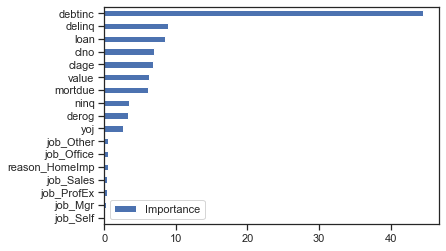

In [176]:
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color ='b')
plt.show()

In [177]:
Importance

Importance
loan              8.503800
mortdue           6.058706
value             6.291745
yoj               2.630201
derog             3.308022
delinq            8.852027
clage             6.793872
ninq              3.440068
clno              6.947791
debtinc          44.521030
reason_HomeImp    0.461273
job_Mgr           0.270536
job_Office        0.560963
job_Other         0.563944
job_ProfEx        0.360184
job_Sales         0.372807
job_Self          0.063031

# MLPClassifier

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1966, 17)
(843, 17)
(1966,)
(843,)


In [16]:
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()

In [17]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.neural_network import MLPClassifier

In [19]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)
mlpc

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [20]:
y_pred= mlpc.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9406880189798339

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       773
           1       0.92      0.31      0.47        70

    accuracy                           0.94       843
   macro avg       0.93      0.66      0.72       843
weighted avg       0.94      0.94      0.93       843



In [22]:

?mlpc

In [23]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [24]:
mlpc= MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv=10,n_jobs=-1, verbose=2)
mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 12.1min finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         '

In [25]:
print("En iyi parametreler : " + str(mlpc_cv_model.best_params_))

En iyi parametreler : {'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


In [26]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha=0.005, 
                           hidden_layer_sizes=(100,100), 
                           solver = "adam")

In [27]:
mlpc_tuned.fit(X_train_scaled, y_train)
y_pred=mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9418742586002372

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       773
           1       0.80      0.40      0.53        70

    accuracy                           0.94       843
   macro avg       0.87      0.70      0.75       843
weighted avg       0.94      0.94      0.93       843



# SupportVectorMachine

In [15]:
dms = pd.get_dummies(dfnan[['reason', 'job']])
dms.head()
y = dfnan["bad"]
X_ = dfnan.drop(["bad", "reason", "job"], axis = 1).astype("float64")
X_.head()
X = pd.concat([X_, dms[["reason_HomeImp", "job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
X.head()

loan   mortdue     value   yoj  derog  delinq   clage  ninq  clno  \
0  81200.0   18834.0  108355.0  28.0    0.0     0.0  139.14   0.0  14.0   
1  12600.0  103960.0  127384.0   2.0    0.0     0.0  129.02   0.0  25.0   
2  18000.0   46865.0   61266.0   5.0    0.0     0.0  102.59   2.0   9.0   
3  10300.0   57676.0   71027.0  19.0    0.0     0.0  157.52   1.0  11.0   
4   9400.0   56508.0   78358.0  17.0    0.0     0.0  141.93   0.0  11.0   

   debtinc  reason_HomeImp  job_Mgr  job_Office  job_Other  job_ProfEx  \
0   34.042               1        0           0          1           0   
1   34.479               0        0           0          1           0   
2   26.354               0        0           0          1           0   
3   33.992               0        0           0          1           0   
4   32.327               0        0           0          1           0   

   job_Sales  job_Self  
0          0         0  
1          0         0  
2          0         0  
3          0         0  
4          0         0

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1966, 17)
(843, 17)
(1966,)
(843,)


In [17]:
from sklearn.svm import SVC
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [18]:
svm_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
y_pred = svm_model.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred)

0.9193357058125742

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       773
           1       0.58      0.10      0.17        70

    accuracy                           0.92       843
   macro avg       0.75      0.55      0.56       843
weighted avg       0.90      0.92      0.89       843



# MODEL TUNING

In [22]:
import numpy as np
svc_params = { "C": [0.0001,0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001 0.001, 0.1, 1, 5, 10 ,50 ,100]}
svc= SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc, svc_params,
                           cv=10,
                           n_jobs=-1,
                           verbose=2)

In [ ]:
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 48.9min


In [331]:
print("En iyi parametreler:" + str(svc_cv_model.best_params_))

En iyi parametreler:{'C': 0.0001, 'gamma': 0.0001}


In [332]:
svc_tuned = SVC(kernel = "linear", C=0.0001, gamma=0.0001).fit(X_train,y_train)

In [333]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9193357058125742

In [334]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       773
           1       1.00      0.03      0.06        70

    accuracy                           0.92       843
   macro avg       0.96      0.51      0.51       843
weighted avg       0.93      0.92      0.88       843



In [335]:
#Importance'ı 5ten büyük değerleri alıyorum

In [26]:
y = dfnan["bad"]
X1 = dfnan[["loan", "mortdue", "value","derog", "debtinc","clno","ninq","clage","delinq","yoj"]]

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1966, 10)
(843, 10)
(1966,)
(843,)


In [28]:
from sklearn.svm import SVC
svm_model_import = SVC(kernel = "linear").fit(X_train, y_train)

In [29]:
svm_model_import

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
y_pred = svm_model_import.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)

0.9157769869513642

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       773
           1       0.44      0.06      0.10        70

    accuracy                           0.92       843
   macro avg       0.68      0.53      0.53       843
weighted avg       0.88      0.92      0.88       843



# RBF SVC

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1966, 17)
(843, 17)
(1966,)
(843,)


In [25]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
svc_model 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9169632265717675

# MODEL TUNNING

In [28]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
              "gamma":[0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]}

In [29]:
svc= SVC()
svc_cv_model = GridSearchCV(svc, svc_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  3.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [30]:
print("En iyi parametreler:" +str(svc_cv_model.best_params_))

En iyi parametreler:{'C': 0.0001, 'gamma': 0.0001}


In [31]:
svc_tuned = SVC(C=0.0001, gamma= 0.0001).fit(X_train , y_train)

In [32]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9169632265717675

# GaussianNB

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1966, 17)
(843, 17)
(1966,)
(843,)


In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()

In [47]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [48]:
nb = GaussianNB()
nb_model = nb.fit(X_train_scaled, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
nb_model.predict(X_test_scaled)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
nb_model.predict_proba(X_test_scaled)[0:10]
#0 gelme ihtimali ve 1 gelme ihtimali

array([[9.94830668e-01, 5.16933238e-03],
       [9.98913730e-01, 1.08626977e-03],
       [9.96353832e-01, 3.64616775e-03],
       [9.98012279e-01, 1.98772129e-03],
       [9.88017777e-01, 1.19822228e-02],
       [9.83906215e-01, 1.60937854e-02],
       [9.97556446e-01, 2.44355385e-03],
       [9.98198987e-01, 1.80101320e-03],
       [9.99503993e-01, 4.96007402e-04],
       [9.95217049e-01, 4.78295086e-03]])

In [51]:
y_pred = nb_model.predict(X_test_scaled)

In [52]:
accuracy_score(y_test, y_pred)

0.8825622775800712

In [54]:
cross_val_score(nb_model, X_test_scaled, y_test).mean()

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8600774481065235

# Model Tunning

In [55]:
nb_params  = {"priors": [(0.1, 0.9), (0.2, 0.8), (0.3, 0.7)]}
nb=GaussianNB()
nb_cv = GridSearchCV(nb, nb_params, cv=10)
nb_cv.fit(X_train_scaled, y_train)
print("En iyi Skor:" +str(nb_cv.best_score_))
print("En İyi Parametreler:" +str(nb_cv.best_params_))

En iyi Skor:0.8189216683621566
En İyi Parametreler:{'priors': (0.3, 0.7)}


In [57]:
nb = GaussianNB(priors= (0.3, 0.7))
nb_model = nb.fit(X_train_scaled, y_train)
nb_model

GaussianNB(priors=(0.3, 0.7), var_smoothing=1e-09)

In [58]:
y_pred = nb_model.predict(X_test_scaled)

In [59]:
accuracy_score(y_test, y_pred)

0.8196915776986952

In [61]:
cross_val_score(nb_model, X_test_scaled, y_test).mean()

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8268582317457914

# BernoulliNB

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1966, 17)
(843, 17)
(1966,)
(843,)


In [104]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
bnb = BernoulliNB()
bnb_model = bnb.fit(X_train , y_train)
bnb_model

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [105]:
bnb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [106]:
y_pred = bnb_model.predict(X_test)

In [107]:
accuracy_score(y_test, y_pred)

0.9169632265717675

In [108]:
cross_val_score(bnb_model, X_test, y_test, cv=10).mean()

0.9169607843137253

# Model Tunning

In [94]:
bnb_params  = {"class_prior": [(0.1, 0.9), (0.2, 0.8), (0.3, 0.7)],
                               "alpha": [0.1,0.01,0.02,0.005]}
bnb=BernoulliNB()
bnb_cv = GridSearchCV(bnb, bnb_params, cv=10)
bnb_cv.fit(X_train, y_train)
print("En iyi Skor:" +str(bnb_cv.best_score_))
print("En İyi Parametreler:" +str(bnb_cv.best_params_))

En iyi Skor:0.1531027466937945
En İyi Parametreler:{'alpha': 0.1, 'class_prior': (0.3, 0.7)}


In [99]:
bnb = BernoulliNB(class_prior= (0.3, 0.7),
                 alpha=0.1)
bnb_model = bnb.fit(X_train, y_train)
bnb_model

BernoulliNB(alpha=0.1, binarize=0.0, class_prior=(0.3, 0.7), fit_prior=True)

In [100]:
y_pred = bnb_model.predict(X_test)

In [101]:
accuracy_score(y_test, y_pred)

0.13997627520759193

In [109]:
cross_val_score(bnb_model, X_test, y_test, cv=10).mean()

0.9169607843137253

# MultinomialNB

In [112]:
train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1966, 17)
(843, 17)
(1966,)
(843,)


In [114]:
mnb = MultinomialNB()
mnb_model = mnb.fit(X_train , y_train)
mnb_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [115]:
mnb_model.predict(X_test)[0:10]

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [117]:
y_pred = mnb_model.predict(X_test)

In [118]:
accuracy_score(y_test, y_pred)

0.4816132858837485

In [119]:
cross_val_score(mnb_model, X_test, y_test, cv=10).mean()

0.5931512605042017

# Model Tunning

In [130]:
mnb_params  = {"class_prior": [(0.1, 0.9), (0.2, 0.8), (0.3, 0.7)],
               "alpha": [0.1,0.01,0.02,0.005]}
mnb=MultinomialNB()
mnb_cv = GridSearchCV(mnb, mnb_params, cv=10)
mnb_cv.fit(X_train, y_train)
print("En iyi Skor:" +str(mnb_cv.best_score_))
print("En İyi Parametreler:" +str(mnb_cv.best_params_))

En iyi Skor:0.47863682604272634
En İyi Parametreler:{'alpha': 0.1, 'class_prior': (0.1, 0.9)}


In [131]:
mnb = MultinomialNB(class_prior= (0.1, 0.9),
                   alpha=0.1)
mnb_model = mnb.fit(X_train, y_train)
mnb_model

MultinomialNB(alpha=0.1, class_prior=(0.1, 0.9), fit_prior=True)

In [132]:
y_pred = mnb_model.predict(X_test)

In [133]:
accuracy_score(y_test, y_pred)

0.4792408066429419

In [134]:
cross_val_score(mnb_model, X_test,y_test, cv=10).mean()

0.5931512605042017

# GradientBoostingClassifier

In [135]:
from sklearn.ensemble import GradientBoostingClassifier

In [136]:
GradientBoostingClassifier()

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [137]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [138]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9383155397390273

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       773
           1       0.85      0.31      0.46        70

    accuracy                           0.94       843
   macro avg       0.89      0.65      0.71       843
weighted avg       0.93      0.94      0.93       843



# Model Tunnig

In [140]:
gbm_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [141]:
?gbm_model

In [142]:
gbm_params = {"learning_rate": [0.001, 0.01, 0.1, 0.2, 0.3],
             "n_estimators":[10, 100, 500], 
             "max_depth":[3,5,8],
             "min_samples_split":[2, 5, 10]}

In [143]:
gbm = GradientBoostingClassifier()

In [144]:
gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose=2)

In [145]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  9.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...None,
                                                  presort='auto

In [146]:
print("En iyi parametreler:" +str(gbm_cv.best_params_))

En iyi parametreler:{'learning_rate': 0.3, 'max_depth': 8, 'min_samples_split': 10, 'n_estimators': 100}


In [147]:
gbm = GradientBoostingClassifier(learning_rate = 0.3,
                                max_depth = 8,
                                min_samples_split = 10,
                                n_estimators = 100) 

In [148]:
gbm_tuned = gbm.fit(X_train, y_train)

In [149]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9501779359430605

In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       773
           1       0.97      0.41      0.58        70

    accuracy                           0.95       843
   macro avg       0.96      0.71      0.78       843
weighted avg       0.95      0.95      0.94       843



# XGBOOST

In [151]:
from xgboost import XGBClassifier

In [152]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [153]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [154]:
y_pred = xgb_model.predict(X_test)

In [155]:
accuracy_score(y_test, y_pred)

0.9466192170818505

# Model Tunning

In [156]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [157]:
?xgb_model

In [158]:
xgb_params = {"learning_rate": [100, 500, 1000, 2000],
              "subsample":[0.6, 0.8, 1.0],
             "max_depth":[3,4,5,6],
              "min_child_weight" : [1]} 

In [159]:
xgb = XGBClassifier()

In [162]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose=2)

In [164]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.9min finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constra...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='war

In [165]:
print("En iyi parametreler:" +str(xgb_cv_model.best_params_))

En iyi parametreler:{'learning_rate': 100, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6}


In [170]:
xgb = XGBClassifier(learning_rate = 100,
                   max_depth = 3,
                    min_child_weight = 1,
                    subsample = 0.6
                    
                   )

In [171]:
xgb_tuned = xgb.fit(X_train, y_train)

In [172]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9169632265717675

Text(0.5, 0, 'Değişken Önem Düzeyleri')

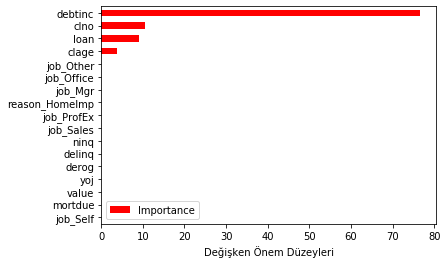

In [173]:
Importance = pd.DataFrame({"Importance": xgb_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# LightGBM

In [174]:
from lightgbm import LGBMClassifier

In [175]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [176]:
y_pred = lgbm_model.predict(X_test)

In [177]:
accuracy_score(y_test, y_pred)

0.9454329774614472

# Model Tunning

In [178]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [179]:
?lgbm_model

In [180]:
lgbm_params = {"learning_rate": [100, 500, 1000, 2000],
              "subsample":[0.6, 0.8, 1.0],
               "importance_type": ["gains", "split"],
              "max_depth":[4,5,6],
              "learnig_rate":[0.1, 0.2 ,0.3],
              "min_child_samples":[10,20]}

In [181]:
lgbm = LGBMClassifier()

In [182]:
lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv =10, n_jobs = -1, verbose=2)

In [183]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  3.3min finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will c

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lamb...,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'importance_type': ['gains', 'split'],
                         'learnig_rat

In [184]:
print("En iyi parametreler:" +str(lgbm_cv_model.best_params_))

En iyi parametreler:{'importance_type': 'gains', 'learnig_rate': 0.1, 'learning_rate': 500, 'max_depth': 4, 'min_child_samples': 10, 'subsample': 0.6}


In [187]:
lgbm = LGBMClassifier(lerning_rate = 500,
                     max_depth = 4,
                     min_sample_split = 2,
                      min_chlid_samples=10,
                      importance_type= 'gains',
                     subsample = 0.6  )

In [188]:
lgbm_tuned = xgb.fit(X_train, y_train)

In [189]:
y_pred = lgbm_tuned.predict(X_test)

In [190]:
accuracy_score(y_test, y_pred)

0.9169632265717675

# CATBOOST

In [192]:
from catboost import CatBoostClassifier

In [193]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.01375
0:	learn: 0.6784421	total: 242ms	remaining: 4m 2s
1:	learn: 0.6625116	total: 247ms	remaining: 2m 3s
2:	learn: 0.6468135	total: 252ms	remaining: 1m 23s
3:	learn: 0.6316526	total: 300ms	remaining: 1m 14s
4:	learn: 0.6176548	total: 304ms	remaining: 1m
5:	learn: 0.6050206	total: 319ms	remaining: 52.8s
6:	learn: 0.5925845	total: 325ms	remaining: 46.1s
7:	learn: 0.5795282	total: 329ms	remaining: 40.8s
8:	learn: 0.5661375	total: 334ms	remaining: 36.8s
9:	learn: 0.5539454	total: 338ms	remaining: 33.5s
10:	learn: 0.5447878	total: 341ms	remaining: 30.7s
11:	learn: 0.5335263	total: 345ms	remaining: 28.4s
12:	learn: 0.5223973	total: 366ms	remaining: 27.8s
13:	learn: 0.5112634	total: 370ms	remaining: 26.1s
14:	learn: 0.5018597	total: 375ms	remaining: 24.6s
15:	learn: 0.4923246	total: 380ms	remaining: 23.4s
16:	learn: 0.4833875	total: 384ms	remaining: 22.2s
17:	learn: 0.4744035	total: 389ms	remaining: 21.2s
18:	learn: 0.4655628	total: 406ms	remaining: 21s
19:	learn: 0.45

169:	learn: 0.1778084	total: 1.63s	remaining: 7.95s
170:	learn: 0.1774025	total: 1.63s	remaining: 7.92s
171:	learn: 0.1771634	total: 1.64s	remaining: 7.88s
172:	learn: 0.1768331	total: 1.64s	remaining: 7.85s
173:	learn: 0.1763284	total: 1.66s	remaining: 7.88s
174:	learn: 0.1759270	total: 1.66s	remaining: 7.85s
175:	learn: 0.1755895	total: 1.67s	remaining: 7.81s
176:	learn: 0.1750615	total: 1.67s	remaining: 7.78s
177:	learn: 0.1748814	total: 1.68s	remaining: 7.75s
178:	learn: 0.1743991	total: 1.68s	remaining: 7.72s
179:	learn: 0.1740989	total: 1.69s	remaining: 7.68s
180:	learn: 0.1739034	total: 1.7s	remaining: 7.67s
181:	learn: 0.1735471	total: 1.7s	remaining: 7.65s
182:	learn: 0.1732369	total: 1.71s	remaining: 7.63s
183:	learn: 0.1728805	total: 1.71s	remaining: 7.6s
184:	learn: 0.1723941	total: 1.72s	remaining: 7.58s
185:	learn: 0.1719817	total: 1.75s	remaining: 7.64s
186:	learn: 0.1716728	total: 1.75s	remaining: 7.62s
187:	learn: 0.1714212	total: 1.76s	remaining: 7.59s
188:	learn: 0.1

328:	learn: 0.1424546	total: 2.86s	remaining: 5.83s
329:	learn: 0.1422509	total: 2.87s	remaining: 5.82s
330:	learn: 0.1420693	total: 2.89s	remaining: 5.84s
331:	learn: 0.1420230	total: 2.9s	remaining: 5.83s
332:	learn: 0.1418691	total: 2.9s	remaining: 5.81s
333:	learn: 0.1417916	total: 2.9s	remaining: 5.79s
334:	learn: 0.1414898	total: 2.91s	remaining: 5.78s
335:	learn: 0.1412013	total: 2.91s	remaining: 5.76s
336:	learn: 0.1410984	total: 2.92s	remaining: 5.75s
337:	learn: 0.1408552	total: 2.93s	remaining: 5.73s
338:	learn: 0.1407235	total: 2.93s	remaining: 5.72s
339:	learn: 0.1404872	total: 2.94s	remaining: 5.7s
340:	learn: 0.1402588	total: 2.94s	remaining: 5.69s
341:	learn: 0.1402097	total: 2.95s	remaining: 5.67s
342:	learn: 0.1399633	total: 2.96s	remaining: 5.68s
343:	learn: 0.1397728	total: 2.98s	remaining: 5.67s
344:	learn: 0.1396370	total: 2.98s	remaining: 5.66s
345:	learn: 0.1395383	total: 2.99s	remaining: 5.65s
346:	learn: 0.1393924	total: 2.99s	remaining: 5.63s
347:	learn: 0.13

499:	learn: 0.1167008	total: 4.19s	remaining: 4.19s
500:	learn: 0.1165969	total: 4.19s	remaining: 4.18s
501:	learn: 0.1163896	total: 4.2s	remaining: 4.17s
502:	learn: 0.1163022	total: 4.22s	remaining: 4.17s
503:	learn: 0.1161659	total: 4.23s	remaining: 4.16s
504:	learn: 0.1160711	total: 4.23s	remaining: 4.15s
505:	learn: 0.1159124	total: 4.24s	remaining: 4.14s
506:	learn: 0.1158084	total: 4.24s	remaining: 4.12s
507:	learn: 0.1156899	total: 4.25s	remaining: 4.11s
508:	learn: 0.1156086	total: 4.25s	remaining: 4.1s
509:	learn: 0.1154866	total: 4.27s	remaining: 4.11s
510:	learn: 0.1153422	total: 4.28s	remaining: 4.09s
511:	learn: 0.1152873	total: 4.29s	remaining: 4.08s
512:	learn: 0.1151951	total: 4.29s	remaining: 4.07s
513:	learn: 0.1151894	total: 4.29s	remaining: 4.06s
514:	learn: 0.1149400	total: 4.3s	remaining: 4.05s
515:	learn: 0.1148845	total: 4.3s	remaining: 4.04s
516:	learn: 0.1147861	total: 4.31s	remaining: 4.02s
517:	learn: 0.1145944	total: 4.31s	remaining: 4.01s
518:	learn: 0.11

671:	learn: 0.0974157	total: 5.59s	remaining: 2.73s
672:	learn: 0.0972570	total: 5.59s	remaining: 2.72s
673:	learn: 0.0971041	total: 5.59s	remaining: 2.71s
674:	learn: 0.0970010	total: 5.6s	remaining: 2.7s
675:	learn: 0.0968771	total: 5.6s	remaining: 2.69s
676:	learn: 0.0967588	total: 5.61s	remaining: 2.68s
677:	learn: 0.0966591	total: 5.63s	remaining: 2.67s
678:	learn: 0.0965710	total: 5.63s	remaining: 2.66s
679:	learn: 0.0964970	total: 5.64s	remaining: 2.65s
680:	learn: 0.0963311	total: 5.64s	remaining: 2.64s
681:	learn: 0.0961766	total: 5.65s	remaining: 2.63s
682:	learn: 0.0959628	total: 5.65s	remaining: 2.62s
683:	learn: 0.0958217	total: 5.68s	remaining: 2.62s
684:	learn: 0.0957649	total: 5.68s	remaining: 2.61s
685:	learn: 0.0956373	total: 5.69s	remaining: 2.6s
686:	learn: 0.0955429	total: 5.69s	remaining: 2.59s
687:	learn: 0.0954672	total: 5.7s	remaining: 2.58s
688:	learn: 0.0953364	total: 5.7s	remaining: 2.57s
689:	learn: 0.0952414	total: 5.71s	remaining: 2.56s
690:	learn: 0.0952

848:	learn: 0.0790092	total: 6.95s	remaining: 1.24s
849:	learn: 0.0789573	total: 6.96s	remaining: 1.23s
850:	learn: 0.0789507	total: 6.96s	remaining: 1.22s
851:	learn: 0.0789476	total: 6.96s	remaining: 1.21s
852:	learn: 0.0788359	total: 6.97s	remaining: 1.2s
853:	learn: 0.0786431	total: 6.97s	remaining: 1.19s
854:	learn: 0.0786357	total: 6.98s	remaining: 1.18s
855:	learn: 0.0785004	total: 6.99s	remaining: 1.18s
856:	learn: 0.0783749	total: 6.99s	remaining: 1.17s
857:	learn: 0.0782044	total: 7s	remaining: 1.16s
858:	learn: 0.0781382	total: 7s	remaining: 1.15s
859:	learn: 0.0779819	total: 7.01s	remaining: 1.14s
860:	learn: 0.0777768	total: 7.01s	remaining: 1.13s
861:	learn: 0.0776314	total: 7.02s	remaining: 1.12s
862:	learn: 0.0775524	total: 7.05s	remaining: 1.12s
863:	learn: 0.0774815	total: 7.06s	remaining: 1.11s
864:	learn: 0.0773956	total: 7.07s	remaining: 1.1s
865:	learn: 0.0772832	total: 7.07s	remaining: 1.09s
866:	learn: 0.0771987	total: 7.08s	remaining: 1.08s
867:	learn: 0.077017

In [194]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9430604982206405

In [195]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       773
           1       1.00      0.31      0.48        70

    accuracy                           0.94       843
   macro avg       0.97      0.66      0.72       843
weighted avg       0.95      0.94      0.93       843



# Model Tunning

In [196]:
catb_params = {"iterations":[200, 500],
              #"max_leaves":[20, 30],
              "learning_rate":[0.01, 0.05],
              "depth":[3, 5, 8]}

In [197]:
catb = CatBoostClassifier()

In [198]:
catb_cv_model = GridSearchCV(catb, catb_params, cv =10, n_jobs = -1, verbose=2)

In [199]:
catb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  5.0min finished


0:	learn: 0.6410733	total: 22ms	remaining: 11s
1:	learn: 0.5867528	total: 45.3ms	remaining: 11.3s
2:	learn: 0.5373364	total: 56.7ms	remaining: 9.39s
3:	learn: 0.4971543	total: 89.4ms	remaining: 11.1s
4:	learn: 0.4641180	total: 109ms	remaining: 10.8s
5:	learn: 0.4303203	total: 143ms	remaining: 11.7s
6:	learn: 0.3993164	total: 153ms	remaining: 10.8s
7:	learn: 0.3754167	total: 163ms	remaining: 10s
8:	learn: 0.3556375	total: 170ms	remaining: 9.25s
9:	learn: 0.3363019	total: 202ms	remaining: 9.9s
10:	learn: 0.3191507	total: 212ms	remaining: 9.42s
11:	learn: 0.3044357	total: 222ms	remaining: 9.03s
12:	learn: 0.2922219	total: 253ms	remaining: 9.49s
13:	learn: 0.2800773	total: 266ms	remaining: 9.24s
14:	learn: 0.2707212	total: 272ms	remaining: 8.78s
15:	learn: 0.2608798	total: 281ms	remaining: 8.49s
16:	learn: 0.2508232	total: 306ms	remaining: 8.7s
17:	learn: 0.2437240	total: 316ms	remaining: 8.46s
18:	learn: 0.2367654	total: 331ms	remaining: 8.38s
19:	learn: 0.2296340	total: 357ms	remaining: 

171:	learn: 0.0632225	total: 2.97s	remaining: 5.67s
172:	learn: 0.0630471	total: 2.98s	remaining: 5.64s
173:	learn: 0.0623864	total: 2.99s	remaining: 5.61s
174:	learn: 0.0619439	total: 3s	remaining: 5.58s
175:	learn: 0.0617093	total: 3.01s	remaining: 5.55s
176:	learn: 0.0612626	total: 3.02s	remaining: 5.51s
177:	learn: 0.0609267	total: 3.07s	remaining: 5.56s
178:	learn: 0.0603667	total: 3.09s	remaining: 5.55s
179:	learn: 0.0598100	total: 3.1s	remaining: 5.51s
180:	learn: 0.0594026	total: 3.11s	remaining: 5.48s
181:	learn: 0.0593637	total: 3.11s	remaining: 5.44s
182:	learn: 0.0591074	total: 3.12s	remaining: 5.41s
183:	learn: 0.0585891	total: 3.13s	remaining: 5.38s
184:	learn: 0.0583635	total: 3.2s	remaining: 5.44s
185:	learn: 0.0581219	total: 3.21s	remaining: 5.41s
186:	learn: 0.0578564	total: 3.21s	remaining: 5.38s
187:	learn: 0.0574072	total: 3.22s	remaining: 5.34s
188:	learn: 0.0570055	total: 3.23s	remaining: 5.32s
189:	learn: 0.0566312	total: 3.24s	remaining: 5.29s
190:	learn: 0.056

332:	learn: 0.0289494	total: 5.46s	remaining: 2.74s
333:	learn: 0.0286965	total: 5.47s	remaining: 2.72s
334:	learn: 0.0286211	total: 5.47s	remaining: 2.7s
335:	learn: 0.0285222	total: 5.48s	remaining: 2.68s
336:	learn: 0.0285002	total: 5.5s	remaining: 2.66s
337:	learn: 0.0284719	total: 5.51s	remaining: 2.64s
338:	learn: 0.0284425	total: 5.56s	remaining: 2.64s
339:	learn: 0.0282726	total: 5.57s	remaining: 2.62s
340:	learn: 0.0280404	total: 5.58s	remaining: 2.6s
341:	learn: 0.0279232	total: 5.59s	remaining: 2.58s
342:	learn: 0.0278242	total: 5.6s	remaining: 2.56s
343:	learn: 0.0276697	total: 5.61s	remaining: 2.54s
344:	learn: 0.0275564	total: 5.61s	remaining: 2.52s
345:	learn: 0.0274228	total: 5.65s	remaining: 2.51s
346:	learn: 0.0274014	total: 5.66s	remaining: 2.5s
347:	learn: 0.0273657	total: 5.67s	remaining: 2.48s
348:	learn: 0.0272233	total: 5.68s	remaining: 2.46s
349:	learn: 0.0270504	total: 5.69s	remaining: 2.44s
350:	learn: 0.0269927	total: 5.7s	remaining: 2.42s
351:	learn: 0.0269

496:	learn: 0.0159146	total: 7.92s	remaining: 47.8ms
497:	learn: 0.0159033	total: 7.93s	remaining: 31.9ms
498:	learn: 0.0158905	total: 7.94s	remaining: 15.9ms
499:	learn: 0.0158367	total: 7.95s	remaining: 0us


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostClassifier object at 0x000001A846771408>,
             iid='warn', n_jobs=-1,
             param_grid={'depth': [3, 5, 8], 'iterations': [200, 500],
                         'learning_rate': [0.01, 0.05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [200]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 500, 'learning_rate': 0.05}

In [201]:
catb = CatBoostClassifier(iterations = 500,
                         learning_rate = 0.05,
                         depth = 8)
catb_tuned=catb.fit(X_train, y_train)

0:	learn: 0.6410733	total: 26.6ms	remaining: 13.3s
1:	learn: 0.5867528	total: 55.2ms	remaining: 13.8s
2:	learn: 0.5373364	total: 64.3ms	remaining: 10.6s
3:	learn: 0.4971543	total: 73.6ms	remaining: 9.12s
4:	learn: 0.4641180	total: 85.6ms	remaining: 8.47s
5:	learn: 0.4303203	total: 156ms	remaining: 12.8s
6:	learn: 0.3993164	total: 164ms	remaining: 11.6s
7:	learn: 0.3754167	total: 172ms	remaining: 10.6s
8:	learn: 0.3556375	total: 178ms	remaining: 9.73s
9:	learn: 0.3363019	total: 199ms	remaining: 9.76s
10:	learn: 0.3191507	total: 207ms	remaining: 9.2s
11:	learn: 0.3044357	total: 215ms	remaining: 8.73s
12:	learn: 0.2922219	total: 242ms	remaining: 9.05s
13:	learn: 0.2800773	total: 256ms	remaining: 8.89s
14:	learn: 0.2707212	total: 261ms	remaining: 8.42s
15:	learn: 0.2608798	total: 276ms	remaining: 8.34s
16:	learn: 0.2508232	total: 340ms	remaining: 9.65s
17:	learn: 0.2437240	total: 347ms	remaining: 9.29s
18:	learn: 0.2367654	total: 355ms	remaining: 8.98s
19:	learn: 0.2296340	total: 363ms	rem

171:	learn: 0.0632225	total: 2.74s	remaining: 5.22s
172:	learn: 0.0630471	total: 2.75s	remaining: 5.2s
173:	learn: 0.0623864	total: 2.76s	remaining: 5.17s
174:	learn: 0.0619439	total: 2.77s	remaining: 5.14s
175:	learn: 0.0617093	total: 2.77s	remaining: 5.11s
176:	learn: 0.0612626	total: 2.79s	remaining: 5.09s
177:	learn: 0.0609267	total: 2.84s	remaining: 5.14s
178:	learn: 0.0603667	total: 2.85s	remaining: 5.11s
179:	learn: 0.0598100	total: 2.86s	remaining: 5.08s
180:	learn: 0.0594026	total: 2.87s	remaining: 5.05s
181:	learn: 0.0593637	total: 2.87s	remaining: 5.02s
182:	learn: 0.0591074	total: 2.88s	remaining: 4.99s
183:	learn: 0.0585891	total: 2.89s	remaining: 4.96s
184:	learn: 0.0583635	total: 2.93s	remaining: 4.98s
185:	learn: 0.0581219	total: 2.94s	remaining: 4.96s
186:	learn: 0.0578564	total: 2.94s	remaining: 4.92s
187:	learn: 0.0574072	total: 2.96s	remaining: 4.91s
188:	learn: 0.0570055	total: 2.97s	remaining: 4.89s
189:	learn: 0.0566312	total: 2.98s	remaining: 4.86s
190:	learn: 0

335:	learn: 0.0285222	total: 5.33s	remaining: 2.6s
336:	learn: 0.0285002	total: 5.34s	remaining: 2.58s
337:	learn: 0.0284719	total: 5.34s	remaining: 2.56s
338:	learn: 0.0284425	total: 5.37s	remaining: 2.55s
339:	learn: 0.0282726	total: 5.38s	remaining: 2.53s
340:	learn: 0.0280404	total: 5.42s	remaining: 2.52s
341:	learn: 0.0279232	total: 5.42s	remaining: 2.51s
342:	learn: 0.0278242	total: 5.43s	remaining: 2.49s
343:	learn: 0.0276697	total: 5.45s	remaining: 2.47s
344:	learn: 0.0275564	total: 5.46s	remaining: 2.45s
345:	learn: 0.0274228	total: 5.46s	remaining: 2.43s
346:	learn: 0.0274014	total: 5.5s	remaining: 2.42s
347:	learn: 0.0273657	total: 5.51s	remaining: 2.41s
348:	learn: 0.0272233	total: 5.53s	remaining: 2.39s
349:	learn: 0.0270504	total: 5.54s	remaining: 2.37s
350:	learn: 0.0269927	total: 5.55s	remaining: 2.36s
351:	learn: 0.0269580	total: 5.56s	remaining: 2.34s
352:	learn: 0.0269413	total: 5.63s	remaining: 2.34s
353:	learn: 0.0266716	total: 5.64s	remaining: 2.33s
354:	learn: 0.

496:	learn: 0.0159146	total: 7.98s	remaining: 48.2ms
497:	learn: 0.0159033	total: 7.99s	remaining: 32.1ms
498:	learn: 0.0158905	total: 7.99s	remaining: 16ms
499:	learn: 0.0158367	total: 8.01s	remaining: 0us


In [202]:
y_pred = catb_tuned.predict(X_test)

In [203]:
accuracy_score(y_test, y_pred)

0.9418742586002372

In [204]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       773
           1       1.00      0.30      0.46        70

    accuracy                           0.94       843
   macro avg       0.97      0.65      0.72       843
weighted avg       0.95      0.94      0.93       843



# KNN

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30,
                                                    random_state=42)

In [206]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [207]:
y_pred = knn_model.predict(X_test)

In [208]:
accuracy_score(y_test,y_pred)

0.9181494661921709

In [209]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       773
           1       0.56      0.07      0.13        70

    accuracy                           0.92       843
   macro avg       0.74      0.53      0.54       843
weighted avg       0.89      0.92      0.89       843



# Model Tunning

In [210]:
knn_params = {"n_neighbors":np.arange(1,40)}

In [211]:
knn=KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [212]:
print("En iyi skor:"+str(knn_cv.best_score_))
print("En iyi parametreler:"+str(knn_cv.best_params_))

En iyi skor:0.9181078331637843
En iyi parametreler:{'n_neighbors': 9}


In [213]:
knn= KNeighborsClassifier(9)
knn_tuned = knn.fit(X_train , y_train)

In [214]:
knn_tuned.score(X_test, y_test)

0.9181494661921709

In [215]:
y_pred = knn_tuned.predict(X_test)

In [216]:
accuracy_score(y_test, y_pred)

0.9181494661921709